In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the model
checkpoint = torch.load('model/checkpoint.pth')

In [3]:
model = checkpoint['model']
model.load_state_dict(checkpoint['state_dict'])
accuracy, loss = checkpoint['accuracy'], checkpoint['loss']

In [4]:
model.eval()

CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (layernorm1): LayerNorm((24, 24), eps=1e-05, elementwise_affine=True)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (layernorm2): LayerNorm((20, 20), eps=1e-05, elementwise_affine=True)
  (cnn3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=576, out_features=10, bias=True)
)

In [6]:
# Load the test dataset
test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashinMNIST', 
    train = False,
    download = False,
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
)

In [8]:
# randomly select 10 images indices in the test dataset
random_ind = torch.randint(0,len(test_set),(10,)) 
random_pics = test_set.data[random_ind,:,:].view(-1,1,28,28)/255.

random_ind

tensor([6472, 1789, 2775, 5397,  533, 8255, 2771, 7615, 7258, 6929])

In [15]:
# The corresponding target labels
real_categories = [test_set.classes[test_set.targets[random_ind][i]] for i in range(10)]
real_categories

['Sneaker',
 'Sneaker',
 'Ankle boot',
 'Coat',
 'Bag',
 'Dress',
 'Trouser',
 'Dress',
 'Shirt',
 'T-shirt/top']

In [12]:
# The model predicated categories for the above 10 images
predications = model(random_pics).argmax(axis=1)
predication_categories = [test_set.classes[predications[i]] for i in range(len(predications))]
predication_categories

['Sneaker',
 'Sneaker',
 'Ankle boot',
 'Coat',
 'Bag',
 'Dress',
 'Trouser',
 'Dress',
 'Coat',
 'T-shirt/top']

([<matplotlib.axis.XTick at 0x7f93810c0da0>,
 [Text(0, 0, 'Sneaker'),
  Text(0, 0, 'Sneaker'),
  Text(0, 0, 'Ankle boot'),
  Text(0, 0, 'Coat'),
  Text(0, 0, 'Bag'),
  Text(0, 0, 'Dress'),
  Text(0, 0, 'Trouser'),
  Text(0, 0, 'Dress'),
  Text(0, 0, 'Coat'),
  Text(0, 0, 'T-shirt/top')])

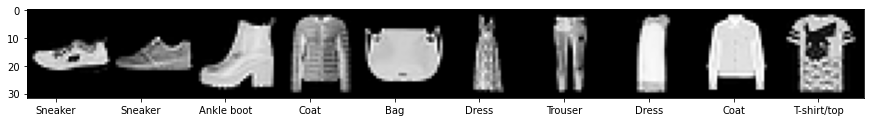

In [14]:
# Visualization of the images and corresponding predicated labels from the model
grid = torchvision.utils.make_grid(random_pics,nrow=10)

plt.figure(figsize=(15,10))
plt.imshow(np.transpose(grid,(1,2,0)))
plt.xticks(np.linspace(10,285,10),predication_categories)